# Data Wrangling with Spark


In [1]:


from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum



import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Wrangling Data") \
    .getOrCreate()

In [3]:
spark

In [4]:
# load dataset from HDFS (storage)
path = "data/sparkify_log_small.json"
user_log = spark.read.json(path)

## Data Exploration 


In [5]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [6]:
user_log.select('*').show(5)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [7]:
# see the columns in the dataframe using printSchema method
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [8]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [9]:
# see count, mean, standard deviation, min and max values of each column using describe method with show method
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [10]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [11]:
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827561|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [12]:
# see how many rows in the dataframe
user_log.count()

10000

In [13]:
# see the distinct values of page column using dropDuplicates method 
# and sort the output alphabetically
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [14]:
# see all the events of a user
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

## Calculating Statistics by Hour

In [15]:
# see how many songs users are listening in a particular hour
# First, we need to convert the timestamps to datetime from epoch time
# user defined functions (UDF)

from pyspark.sql.functions import udf
import datetime

get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)

In [16]:
user_log.describe("ts").show()

+-------+-------------------+
|summary|                 ts|
+-------+-------------------+
|  count|              10000|
|   mean| 1.5137859954164E12|
| stddev|3.290828862357974E7|
|    min|      1513720872284|
|    max|      1513848349284|
+-------+-------------------+



In [17]:
user_log.select('ts').collect()

[Row(ts=1513720872284),
 Row(ts=1513720878284),
 Row(ts=1513720881284),
 Row(ts=1513720905284),
 Row(ts=1513720913284),
 Row(ts=1513720932284),
 Row(ts=1513720955284),
 Row(ts=1513720959284),
 Row(ts=1513720959284),
 Row(ts=1513720980284),
 Row(ts=1513720983284),
 Row(ts=1513720993284),
 Row(ts=1513721031284),
 Row(ts=1513721045284),
 Row(ts=1513721058284),
 Row(ts=1513721077284),
 Row(ts=1513721088284),
 Row(ts=1513721095284),
 Row(ts=1513721097284),
 Row(ts=1513721104284),
 Row(ts=1513721104284),
 Row(ts=1513721109284),
 Row(ts=1513721127284),
 Row(ts=1513721160284),
 Row(ts=1513721182284),
 Row(ts=1513721196284),
 Row(ts=1513721206284),
 Row(ts=1513721207284),
 Row(ts=1513721214284),
 Row(ts=1513721230284),
 Row(ts=1513721243284),
 Row(ts=1513721247284),
 Row(ts=1513721249284),
 Row(ts=1513721266284),
 Row(ts=1513721267284),
 Row(ts=1513721274284),
 Row(ts=1513721278284),
 Row(ts=1513721282284),
 Row(ts=1513721310284),
 Row(ts=1513721310284),
 Row(ts=1513721321284),
 Row(ts=15137213

In [18]:
# since Spark lazy evaluation, nothing happened so far.
# user defined funciton applied with withColumn method

user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [19]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='17')

In [20]:
# Number of distinct users in the dataset
num_users = user_log.select("userId").dropDuplicates().count()
num_users

964

In [21]:
# using filter method
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  276|
|   1|  348|
|   2|  358|
|   3|  375|
|   4|  249|
|   5|  216|
|   6|  228|
|   7|  251|
|   8|  339|
|   9|  462|
|  10|  479|
|  11|  484|
|  12|  430|
|  13|  362|
|  14|  295|
|  15|  257|
|  16|  248|
|  17|  369|
|  18|  375|
|  19|  456|
+----+-----+
only showing top 20 rows



In [22]:
# using where method

# Same function to the previous songs_in_hour
#user_log.select(["hour"]).where(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float")).show()

user_log.where(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float")).show()

+----+-----+
|hour|count|
+----+-----+
|   0|  276|
|   1|  348|
|   2|  358|
|   3|  375|
|   4|  249|
|   5|  216|
|   6|  228|
|   7|  251|
|   8|  339|
|   9|  462|
|  10|  479|
|  11|  484|
|  12|  430|
|  13|  362|
|  14|  295|
|  15|  257|
|  16|  248|
|  17|  369|
|  18|  375|
|  19|  456|
+----+-----+
only showing top 20 rows



In [23]:
# To visualize results Spark datafram can be converted into Pandas dataframe using toPandas method
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd

,hour,count
0,0,276
1,1,348
2,2,358
3,3,375
4,4,249
5,5,216
6,6,228
7,7,251
8,8,339
9,9,462


In [24]:
# to_numeric function
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

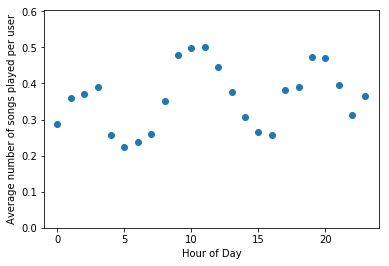

In [25]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"]/num_users)
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]/num_users))
plt.xlabel("Hour of Day")
plt.ylabel("Average number of songs played per user");

## Drop Rows with Missing Values


In [26]:
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])

In [27]:
user_log_valid.count()

10000

In [28]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [29]:
# there is suspicious empty string in userId column
# filter out all the rows that has this empty string value as the user id
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [30]:
user_log_valid.count()

9664

## Users Downgrade Their Accounts

**Find when users downgrade their accounts to flag those log entries.** 

In [31]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|   6|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [32]:
user_log.select(["userId", "firstname", "page", "level", "song"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [33]:
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [34]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [35]:
user_log_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='17', downgraded=0)

In [36]:
user_log_valid.select(["userId", "firstname", "page", "level", "song", "downgraded", "ts"]).where(user_log.userId == "1138").show(100)

+------+---------+----------------+-----+--------------------+----------+-------------+
|userId|firstname|            page|level|                song|downgraded|           ts|
+------+---------+----------------+-----+--------------------+----------+-------------+
|  1138|    Kelly|            Home| paid|                null|         0|1513729066284|
|  1138|    Kelly|        NextSong| paid| Everybody Everybody|         0|1513729066284|
|  1138|    Kelly|        NextSong| paid|               Gears|         0|1513729313284|
|  1138|    Kelly|        NextSong| paid|        Use Somebody|         0|1513729552284|
|  1138|    Kelly|        NextSong| paid|Love Of My Life (...|         0|1513729783284|
|  1138|    Kelly|        NextSong| paid|Down In The Valle...|         0|1513730001284|
|  1138|    Kelly|        NextSong| paid|Treat Her Like A ...|         0|1513730263284|
|  1138|    Kelly|        NextSong| paid|Everybody Thinks ...|         0|1513730518284|
|  1138|    Kelly|        NextSo

#### Use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

In [37]:
from pyspark.sql import Window

In [38]:
Window.unboundedPreceding

-9223372036854775808

In [39]:
#windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)
windowval = Window.partitionBy("userId").orderBy(desc("ts")) 

In [40]:
# add phase column for cumulative sum to distinguish before and after the downgrade events
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

In [41]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").sort("ts").show(100)

+------+---------+-------------+----------------+-----+-----+
|userId|firstname|           ts|            page|level|phase|
+------+---------+-------------+----------------+-----+-----+
|  1138|    Kelly|1513729066284|            Home| paid|    1|
|  1138|    Kelly|1513729066284|        NextSong| paid|    1|
|  1138|    Kelly|1513729313284|        NextSong| paid|    1|
|  1138|    Kelly|1513729552284|        NextSong| paid|    1|
|  1138|    Kelly|1513729783284|        NextSong| paid|    1|
|  1138|    Kelly|1513730001284|        NextSong| paid|    1|
|  1138|    Kelly|1513730263284|        NextSong| paid|    1|
|  1138|    Kelly|1513730518284|        NextSong| paid|    1|
|  1138|    Kelly|1513730768284|        NextSong| paid|    1|
|  1138|    Kelly|1513731182284|        NextSong| paid|    1|
|  1138|    Kelly|1513731435284|        NextSong| paid|    1|
|  1138|    Kelly|1513731695284|        NextSong| paid|    1|
|  1138|    Kelly|1513731857284|        NextSong| paid|    1|
|  1138|